# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 5.6.4 Minimum Entropy Autofocus
---

**Import modules**

In [1]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt

import h5py

import sys

**Load the data**

In [2]:
f = h5py.File('ICEYE_SLC.h5', 'r')

**Form complex image data**

In [3]:
s = f['s_i'][:] + 1j * f['s_q'][:]

s = s.T

**Set the dynamic range for the image (dB)**

In [4]:
dynamic_range = 65

**Get the data size and calculate the image ratio**

In [5]:
nx, ny = s.shape

ratio = ny/nx

**Set the offset from image center**

In [6]:
offset_x = 1000
offset_y = 3000

xc = np.round(nx/2) - offset_x
yc = np.round(ny/2) - offset_y

# OR - specify a span / or fixed aspect

xs = 1000
ys = 2000
# ys = np.round(ratio * xs)

# OR - Use the full image
# xs = nx/2-1
# ys = ny/2-1

index_x = [xc - xs, xc + xs]
index_y = [yc - ys, yc + ys]

# OR - Specific region
# index_x = [1, 19310]
# index_y = [1, 5000]

xs = np.round( (index_x[1] - index_x[0]) / 2)
ys = np.round( (index_y[1] - index_y[0]) / 2)

#**Extract desired image area**
s = s[int(index_x[0]):int(index_x[1]), int(index_y[0]):int(index_y[1])]

nx, ny = s.shape

**Calculate the phase error**

In [16]:
t = np.linspace(-1.00, 1.50, int(nx))

phi = 10*(t**2 + np.cos(t**4)**2)
phi = phi - phi[0]

**Calculate the phase error term**

In [17]:
phase_term = np.outer(np.exp(1j * phi), np.ones(ny))

fmn = np.fft.fftshift(np.fft.fft(s, axis=0), 0)

g = np.fft.ifft(phase_term * fmn, axis=0)

**Save the corrupted image**

In [18]:
gc = g

# for i in range(iterations)

# Calculate the individual terms
term1 = np.conj(fmn) / nx

term2 = (1 + np.log2(np.abs(g)**2 + sys.float_info.min)) * g

term3 = np.fft.fft(term2, axis=0)



# Loop over the range lines
a = 0

for n in range(ny):

    a += term1[:,n] * term3[:,n]


    
# Unwrap the phase
phi_c = np.unwrap(np.angle(a))

phase_term = np.outer(np.exp(-1j * phi_c), np.ones(ny))

fmn = np.fft.fft(g, axis=0)

g = np.fft.ifft(phase_term * fmn, axis=0)

fmn = np.fft.fft(g, axis=0)

**Display the original image**

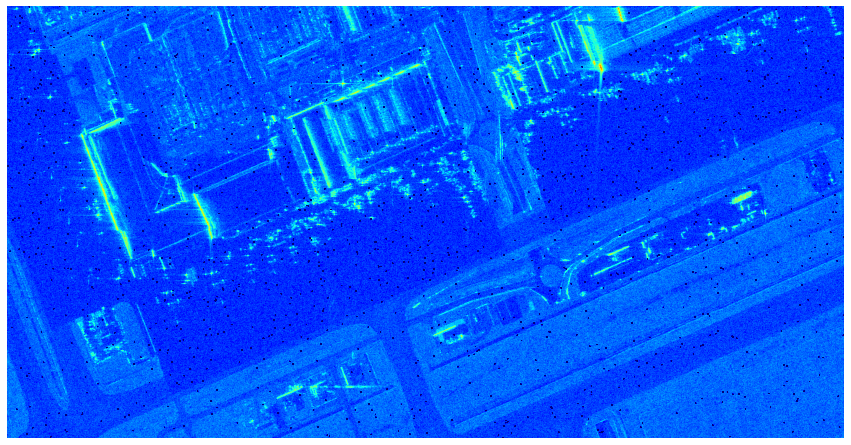

In [19]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 12)



# Plot the original image

plt.figure

plt.imshow(20 * np.log10(np.abs(s.T) / np.max(np.abs(s)) + sys.float_info.min), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Turn off the axis ticks

plt.axis('off')



# Make the axes match the image ratio

plt.gca().set_aspect(aspect=1/ratio, adjustable='box')



# Show the figure

plt.show()

**Display the corrupted image**

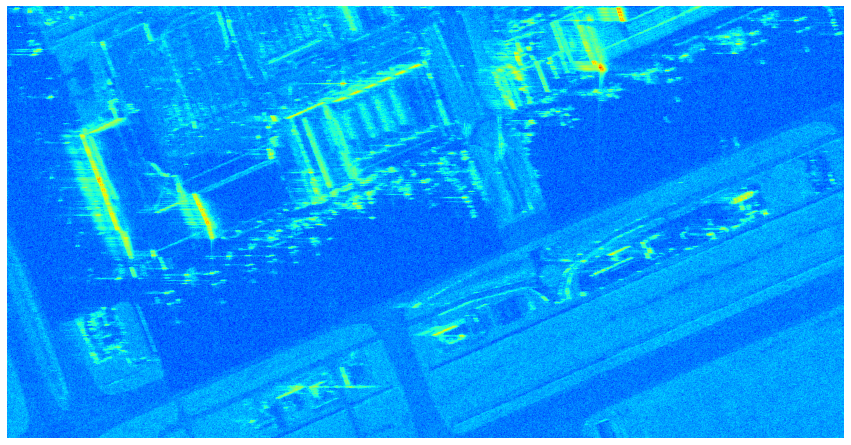

In [20]:
# Plot the corrupted image

plt.figure

plt.imshow(20 * np.log10(np.abs(gc.T) / np.max(np.abs(gc)) + sys.float_info.min), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Turn off the axis ticks

plt.axis('off')



# Make the axes match the image ratio

plt.gca().set_aspect(aspect=1/ratio, adjustable='box')



# Show the figure

plt.show()

**Compare phase error**

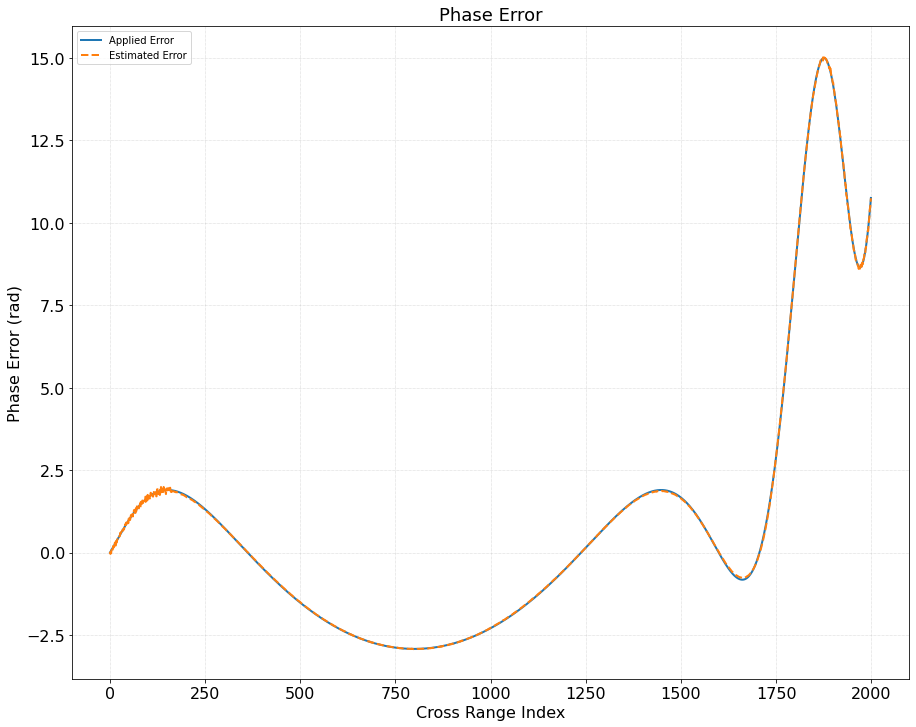

In [21]:
# Plot the phase error

plt.figure

plt.plot(phi, linewidth=2, label='Applied Error')

plt.plot(phi_c, linewidth=2, linestyle='--', label='Estimated Error')



# Set the plot title and labels

plt.title('Phase Error', size=18)

plt.xlabel('Cross Range Index', size=16)

plt.ylabel('Phase Error (rad)', size=16)



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Display the legend

plt.legend(loc='best')



# Display the figure

plt.show()

**Display the corrected image**

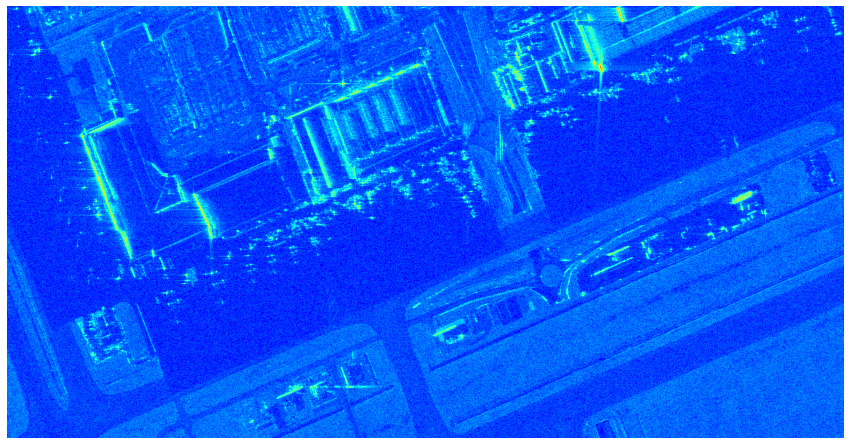

In [22]:
# Plot the corrected image

plt.figure

plt.imshow(20 * np.log10(np.abs(g.T) / np.max(np.abs(g)) + sys.float_info.min), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Turn off the axis ticks

plt.axis('off')



# Make the axes match the image ratio

plt.gca().set_aspect(aspect=1/ratio, adjustable='box')



# Show the figure

plt.show()